<h1>BoomBikes Data</h1>
<h2>Abstract</h2>
<p>A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.</p> 
<p>
<b>BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.</b> They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits

<h2>Problem Statement</h2>
<p>BoomBikes has contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:</p> 

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands
 
<p>Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.</p> 

<h2>Business Goal</h2>

<p>We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. </p> 


<h2>Solution Approach</h2>
<b>We'll use multiple leinear regression to solve this problem</b>


<h2>Solution Steps</h2>
<h3>We'll solve this problem in below mentioned multiple steps:</h3> 

 1. Reading and Understanding the Data
 2. Visualizing the Data
 3. Data Preparation
 4. Splitting the Data into Training and Testing Sets
 5. Building model(s)
 6. Residual Analysis of the train data
 7. Making Predictions Using the Final Model
 8. Model Evaluation
 9. Conclusion
 
<h2>Assumptions</h2>
 
 1. As business is looking for strategy for future time will be crucial factor<br>
 2. <b>Will be using plotly library to keep plots clean and interactive</b>
 3. <b style="background-color:DodgerBlue; color:white;">Some plotting may look overkill but I want to explore them all</b>

**Libs Installations**  
pip install numpy pandas matplotlib seaborn plotly chart-studio statsmodels scikit-learn pingouin --no-cache-dir

**References**

https://plotly.com/python/distplot/  
https://plotly.com/python/plotly-express/


<h2>Imports</h2>

In [82]:
# Data Reading, Wrangling, and processing Libs
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Plotting Libs

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
import plotly.figure_factory as ff

# Modeling Libs
from sklearn.linear_model import LinearRegression

# Feature Selection
from sklearn.feature_selection import RFE, RFECV

# Statistical Libs
import pingouin as pg
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Utility Libs
from IPython.display import display,Markdown
import calendar
from typing import Callable, Dict, Sequence, Tuple, Union
from enum import Enum, auto
import os
import warnings
from datetime import datetime, date

<h2>Setup</h2>

In [83]:
# Set current library for as working dir
# os.chdir(os.path.dirname(__file__))

# Pandas Setup
pd.options.display.max_columns = None
pd.options.display.max_rows = 100
pd.options.mode.use_inf_as_na = True
pd.set_option('precision', 8)
pd.options.display.float_format = '{:.4f}'.format

# Magic Commands
# : matplotlib
%matplotlib inline
# Seaborn Style
sns.set(style="whitegrid")

# Ignore Warnings
warnings.filterwarnings('ignore')
# Jupyter setup
init_notebook_mode(connected=True)

<h2>Global variables</h2>

In [84]:
# columns
instant = 'instant'
dteday = 'dteday'
season = 'season'
yr = 'yr'
mnth = 'mnth'
holiday = 'holiday'
weekday = 'weekday'
workingday = 'workingday'
weathersit = 'weathersit'
temp = 'temp'
atemp = 'atemp'
hum = 'hum'
windspeed = 'windspeed'
casual = 'casual'
registered = 'registered'
cnt = 'cnt'
month = 'month'
date_of_month = 'date_of_month'
week_day = 'week_day'
week_day_name = 'week_day_name'
quarter = 'quarter'
week_of_year = "week_of_year"
numeric_columns = [temp, atemp, hum, windspeed, casual, registered, cnt]

col_name_map = {
    dteday: "Date On",
    season: "Season",
    yr: "Year",
    mnth: "Month Number",
    holiday: " Is holiday",
    weekday: "Weekday",
    workingday: "Is Working Day",
    weathersit: "Weather Type",
    temp: "Temperature in Celsius",
    atemp: "Feeling temperature in Celsius",
    hum: "Humidity in %",
    windspeed: "Wind Speed",
    casual: "Count of casual users",
    registered: "Count of registered users",
    cnt: "Total User Counts",
    month: "Month Of Year",
    date_of_month: "Date of Month",
    week_day: "Week Day",
    week_day_name: "Week day Name",
    quarter: "Quarter",
    week_of_year: "Week of the year"
}


seasons_map = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weathersit_map = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}
workingday_map = {1: "Working", 0: "Non Workind"}
#  Set name value mapping
month_name_map = {i: date(datetime.now().year, i, 1).strftime('%B')
                  for i in range(1, 13)}
holiday_map = {1: "Holiday", 0: "Non Holiday"}
# Listing from Tuesday because in this file Tuesday is considered as 0
days_of_week = ["Tuesday", "Wednesday", "Thursday",
                "Friday", "Saturday", "Sunday", "Monday"]
weekday_map = {i: days_of_week[i] for i in range(len(days_of_week))}
year_map = {0: 2018, 1: 2019}
date_of_month_map = {i: i for i in range(1, 32)}
quarter_map = {1: "First", 2: "Second", 3: "Third", 4: "Fourth"}
col_value_map = {
    workingday: workingday_map,
    month: month_name_map,
    mnth: month_name_map,
    holiday: holiday_map,
    week_day: weekday_map,
    weekday: weekday_map,
    yr: year_map,
    season: seasons_map,
    weathersit: weathersit_map,
    date_of_month: date_of_month_map,
    quarter: quarter_map
}

<h2>Utility Functions</h2>

In [85]:


class GraphType(Enum):
    """Graph Type Enum

    Args:
        Enum ([type]): Built-in Enum Class
    """
    BAR = auto()
    LINE = auto()


def plot_univariate_series(
        series: pd.Series,
        title: str,
        xlabel: str,
        ylabel: str,
        graph_type: GraphType = None,
        **kwargs) -> None:
    """Bar plots a interger series

    Args:
        series (pd.Series): series to be plotted
        title (str): graph title
        xlabel (str): x-axis label
        ylabel (str): y-axis label
        display_format (str, optional): number format. Defaults to '{0:,.0f}'.
        figsize ([type], optional): figure size. Defaults to None.
        show_count (bool, optional): show value at the top of bar. Defaults to True.
        graph_type (GraphType, optional): graph type
    """
    labels = {"x": xlabel, "y": ylabel}
    fig = None
    if graph_type is None or graph_type == GraphType.BAR:
        fig = px.bar(x=series.index, y=series, color=series.index,
                     title=title, labels=labels, **kwargs)
    if graph_type == GraphType.LINE:
        px.scatter(x=series.index, y=series, title=title, labels=labels, color=series.index,
                   **kwargs)
    fig.show()


def get_univariate_cat_plot_strs(value: str) -> Tuple[str, str, str]:
    """Creates graph title, x-axis text and y-axis text for given value

    Args:
        value (str): column name

    Returns:
        Tuple[str, str, str]: title, x-axis text and y-axis text
    """
    title_case = value.replace('_', '').title()
    count_str = title_case + ' Count'
    return count_str + ' Plot', title_case, count_str


def plot_univariate_categorical_columns(categorical_cols: Sequence[str], dataframe: pd.DataFrame, **kwargs) -> None:
    """plots categorical variable bars

    Args:
        categorical_cols (Sequence[str]): categorical columns
        dataframe (pd.DataFrame): DataFrame
    """
    for c in categorical_cols:
        value_counts_ser = dataframe[c].value_counts().sort_index()
        cnt_len = len(value_counts_ser)
        if cnt_len < 16:
            t, xl, yl = get_univariate_cat_plot_strs(c)
            value_counts_ser.index = value_counts_ser.index.map(
                col_value_map[c])
            plot_univariate_series(value_counts_ser, t,
                                   xl, yl, **kwargs)



<h2>Step 1: Reading and Understanding the Data</h2>

In [86]:
df = pd.read_csv("day.csv")

In [87]:
df.shape

(730, 16)

In [88]:
df.head()


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit    temp   atemp     hum  windspeed  casual  registered   cnt  
0           2 14.1108 18.1812 80.5833    10.7499     331         654   985  
1           2 14.9026 17.6869 69.6087    16.6521     131         670   801  
2           1  8.0509  9.4703 43.7273    16.6367     120        1229  1349  
3           1  8.2000 10.6061 59.0435    10.7398     108        1454  1562  
4           1  9.3052 11.4635 43.6957    12.5223      82        1518  1600

In [89]:
df.describe().T


count      mean       std     min       25%       50%       75%  \
instant    730.0000  365.5000  210.8771  1.0000  183.2500  365.5000  547.7500   
season     730.0000    2.4986    1.1102  1.0000    2.0000    3.0000    3.0000   
yr         730.0000    0.5000    0.5003  0.0000    0.0000    0.5000    1.0000   
mnth       730.0000    6.5260    3.4502  1.0000    4.0000    7.0000   10.0000   
holiday    730.0000    0.0288    0.1673  0.0000    0.0000    0.0000    0.0000   
weekday    730.0000    2.9973    2.0062  0.0000    1.0000    3.0000    5.0000   
workingday 730.0000    0.6836    0.4654  0.0000    0.0000    1.0000    1.0000   
weathersit 730.0000    1.3945    0.5448  1.0000    1.0000    1.0000    2.0000   
temp       730.0000   20.3193    7.5067  2.4243   13.8119   20.4658   26.8806   
atemp      730.0000   23.7263    8.1503  3.9535   16.8897   24.3682   30.4458   
hum        730.0000   62.7652   14.2376  0.0000   52.0000   62.6250   72.9896   
windspeed  730.0000   12.7636    5.1958  1.5002    9.0417   12.1253   15.6256   
casual     730.0000  849.2493  686.4799  2.0000  316.2500  717.0000 1096.5000   
registered 730.0000 3658.7575 1559.7587 20.0000 2502.2500 3664.5000 4783.2500   
cnt        730.0000 4508.0068 1936.0116 22.0000 3169.7500 4548.5000 5966.0000   

                 max  
instant     730.0000  
season        4.0000  
yr            1.0000  
mnth         12.0000  
holiday       1.0000  
weekday       6.0000  
workingday    1.0000  
weathersit    3.0000  
temp         35.3283  
atemp        42.0448  
hum          97.2500  
windspeed    34.0000  
casual     3410.0000  
registered 6946.0000  
cnt        8714.0000

In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [91]:
df.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<h3>Dropping Identity</h3>

In [92]:

df.drop(instant, axis=1, inplace=True)


**We can observe that**

 - No Nulls in data
 - dteday should be date
 - season, yr, mnth, holiday,weekday, workingday, weathersit should be category

**So we'll convert them correspondingly**

In [93]:
# convert columns to category
cat_columns = [season, yr, mnth, holiday, weekday, workingday, weathersit]
df[cat_columns] = df[cat_columns].astype('category')
df.dtypes

dteday          object
season        category
yr            category
mnth          category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

In [94]:
# convert dteday as date
df[dteday] = pd.to_datetime(df[dteday], format='%d-%m-%Y')
df.dtypes



dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

**Data types look good now**

In [95]:
df.describe().T


count      mean       std     min       25%       50%       75%  \
temp       730.0000   20.3193    7.5067  2.4243   13.8119   20.4658   26.8806   
atemp      730.0000   23.7263    8.1503  3.9535   16.8897   24.3682   30.4458   
hum        730.0000   62.7652   14.2376  0.0000   52.0000   62.6250   72.9896   
windspeed  730.0000   12.7636    5.1958  1.5002    9.0417   12.1253   15.6256   
casual     730.0000  849.2493  686.4799  2.0000  316.2500  717.0000 1096.5000   
registered 730.0000 3658.7575 1559.7587 20.0000 2502.2500 3664.5000 4783.2500   
cnt        730.0000 4508.0068 1936.0116 22.0000 3169.7500 4548.5000 5966.0000   

                 max  
temp         35.3283  
atemp        42.0448  
hum          97.2500  
windspeed    34.0000  
casual     3410.0000  
registered 6946.0000  
cnt        8714.0000

<h2>EDA</h2>

<h2>Observation about target columns</h2>
<h4>
Here we can select casual, registered, and cnt as target variables separately for analysis

 - Though we'll see their relationship
 - For this analysis we'll consider **cnt as target column**
</h4>

<h2>Step 2. Visualizing the Data</h2>

<h3>Uni Variate analysis</h3>

In [96]:
cat_columns = df.select_dtypes(include='category').columns
plot_univariate_categorical_columns(cat_columns, df)


**Conclusions:**

 1. Seasons are almost equally distributed
 2. We have data for complete two years
 3. Data is present for all months and all days
 4. There were 21 days for holiday
 5. 231 were non working and 499 working days
 6. Weathers:
   - 463 days were clear, Few clouds, Partly cloudy, Partly cloudy
   - 246 days were Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   - 21 days were Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 7. Mostly weather was good

In [97]:


def plot_hist(df: pd.DataFrame, x: str, y: str, title: str, **kwargs):
    """Plot Histograms for given dataframe and selected columns

    Args:
        df (pd.DataFrame): Dataframe
        x (str): x-axis column
        y (str): y-axis column
        title (str): Title for graph
    """
    fig = px.histogram(
        df, x=x, y=y, title="Histogram for " + title.title(), **kwargs)
    fig.show()


def plot_area(df: pd.DataFrame, x: str, y: str, title: str, **kwargs):
    """Plot AreaGraph for given dataframe and selected columns

    Args:
        df (pd.DataFrame): Dataframe
        x (str): x-axis column
        y (str): y-axis column
        title (str): Title for graph
    """
    fig = px.area(df, x=x, y=y, title="Trend for " +
                  title.title(), line_shape="spline", **kwargs)
    fig.show()


def plot_box(df: pd.DataFrame, x: str, y: str, title: str, **kwargs):
    """Plot BoxPlot for given dataframe and selected columns

    Args:
        df (pd.DataFrame): Dataframe
        x (str): x-axis column
        y (str): y-axis column
        title (str): Title for graph
    """
    fig = px.box(df, x=x, y=y, title="Box and Whisker plot for " +
                 title.title(), **kwargs)
    fig.show()


def plot_numeric_col(df: pd.DataFrame, x: str, y: str, title: str, plotters: Callable[[pd.DataFrame, str, str, str, dict], None], **kwargs) -> None:
    """This is a higher order function, which plot selected(passed function refs in plotters variable) plots for given dataframe and selected columns

    Args:
        df (pd.DataFrame): Dataframe
        x (str): x-axis column
        y (str): y-axis column
        title (str): Title for graph
        plotters ([type]): plotting functions
    """
    if df is not None and x is not None and y is not None and title is not None and plotters is not None:
        for plt_fun in plotters:
            plt_fun(df, x, y, title, **kwargs)



In [98]:
numeric_col_names = [col_name_map.get(cn) for cn in numeric_columns]


In [99]:


def box_for_numerics() -> None:
    for col in numeric_columns:
        col_name = col_name_map.get(col)
        fig = px.box(df, y=col, title="Box and Whisker plot for " +
                     col_name.title(), labels={col: col_name})
        fig.show()



In [100]:
box_for_numerics()

**It is clear that 2019 has been better than 2018 for BoomBike**

Lets plot 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered' and 'cnt' plots against 'dteday'

In [101]:


def plot_numeric_columns_trends_for_data() -> None:
    for col in numeric_columns:
        col_name = col_name_map.get(col)
        plot_numeric_col(df, x=dteday, y=col, title=col_name,
                         plotters=[plot_hist, plot_area], labels={dteday: "Dates", col: col_name})



In [102]:
plot_numeric_columns_trends_for_data()

In [103]:


def numeric_values_box(df: pd.DataFrame, x_col_name: str) -> None:
    for col in numeric_columns:
        col_name = col_name_map.get(col)
        df_plot = df[[col, x_col_name]]
        df_plot[x_col_name] = df_plot[x_col_name].map(
            col_value_map.get(x_col_name))
        plot_numeric_col(df_plot, x=x_col_name, y=col, title=col_name,
                         plotters=[plot_box], labels={x_col_name: col_name_map.get(x_col_name), col: col_name}, color=x_col_name)



In [104]:
#  year wise change in numeric values
numeric_values_box(df, yr)


In [105]:
# month wise change in numeric values
numeric_values_box(df, mnth)


<h3>Date Break up features</h3>

In [106]:
# Extract date parts
df[date_of_month] = df[dteday].dt.day
df[quarter] = df[dteday].dt.quarter
df[week_day_name] = df[dteday].dt.day_name
df[week_of_year] = df[dteday].dt.week

In [107]:
# Day wise
numeric_values_box(df, date_of_month)

In [108]:
# Quarter wise
numeric_values_box(df, quarter)

In [109]:
# Week days wise
numeric_values_box(df, weekday)


<h3>Scatter plots </h3>

In [110]:


def plot_scatter_col_vs_counts(data: pd.DataFrame, col: str, **kwargs) -> None:
    for cnt_col in [casual, registered, cnt]:
        plot_df = data[[col, cnt_col, yr]]
        plot_df[yr] = plot_df[yr].map(col_value_map.get(yr))
        fig = px.scatter(plot_df, x=col, y=cnt_col, color=yr, title="Scatter for " +
                         # size=cnt_col,
                         col_name_map.get(col) + " vs " + \
                         col_name_map.get(cnt_col),
                         labels={
                             yr: col_name_map.get(yr),
                             col: col_name_map.get(col),
                             cnt_col: col_name_map.get(cnt_col),
                         }, ** kwargs)
        fig.show()



In [111]:
plot_scatter_col_vs_counts(df, temp)



In [112]:
# User type Relationship

fig = px.line(df, x=dteday, y=[casual, registered, cnt], width=1200)
fig.show()

In [113]:


def plot_bike_usage_trends_vs_numeric_columns() -> None:
    for num_col in numeric_columns:
        fig = px.line(df, x=dteday, y=num_col, width=1200,
                      #   facet_col=dteday, facet_col_spacing=0.04,
                      labels={
                          num_col: col_name_map.get(num_col),
                          dteday: col_name_map.get(dteday),
                      }, title=f"{col_name_map.get(num_col)} Trend")
        fig.show()



In [114]:
plot_bike_usage_trends_vs_numeric_columns()

<h2>Bi-Variate Analysis</h2>

**Pair plot**

In [115]:
# pair plot
fig = px.scatter_matrix(df[numeric_columns], width=1200, height=1200)
fig.show()


###  temp is having best relationship with usage, i. e. in worm weather peple are more tend to use bikes   

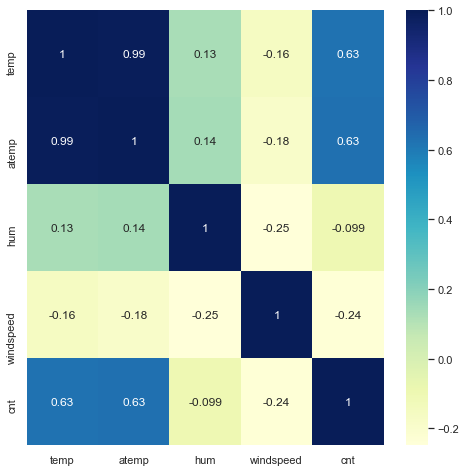

In [116]:
# Numeric column heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(df[[temp, atemp, hum, windspeed, cnt]].corr(),
            annot=True, cmap="YlGnBu")
plt.show()

Growth check for each count ie casual, registered and cnt

In [117]:
df_for_growth = df[[yr, casual, registered, cnt]].melt(
    id_vars=[yr], value_vars=[casual, registered, cnt])
plot_numeric_col(df_for_growth, x=yr, y='value', title='Bike use trend break up',
                 plotters=[plot_box], color='variable')


**We can see that each component has growth**

<h3>Multi Variate analysis</h3>

In [118]:
# Pairwise correlation
pg.pairwise_corr(df, columns=[temp, atemp, hum,
                              windspeed, cnt], method='pearson')

X          Y   method       tail    n       r           CI95%  \
0       temp      atemp  pearson  two-sided  730  0.9917    [0.99, 0.99]   
1       temp        hum  pearson  two-sided  730  0.1286     [0.06, 0.2]   
2       temp  windspeed  pearson  two-sided  730 -0.1582  [-0.23, -0.09]   
3       temp        cnt  pearson  two-sided  730  0.6270    [0.58, 0.67]   
4      atemp        hum  pearson  two-sided  730  0.1415    [0.07, 0.21]   
5      atemp  windspeed  pearson  two-sided  730 -0.1839  [-0.25, -0.11]   
6      atemp        cnt  pearson  two-sided  730  0.6307    [0.58, 0.67]   
7        hum  windspeed  pearson  two-sided  730 -0.2485  [-0.32, -0.18]   
8        hum        cnt  pearson  two-sided  730 -0.0985  [-0.17, -0.03]   
9  windspeed        cnt  pearson  two-sided  730 -0.2351   [-0.3, -0.17]   

      r2  adj_r2       z  p-unc       BF10  power  
0 0.9835  0.9834  2.7400 0.0000        nan 1.0000  
1 0.0165  0.0138  0.1293 0.0005     19.671 0.9367  
2 0.0250  0.0223 -0.1595 0.0000     458.51 0.9905  
3 0.3932  0.3915  0.7365 0.0000  2.616e+77 1.0000  
4 0.0200  0.0173  0.1425 0.0001     71.672 0.9702  
5 0.0338  0.0312 -0.1860 0.0000  1.227e+04 0.9989  
6 0.3978  0.3961  0.7426 0.0000  4.093e+78 1.0000  
7 0.0618  0.0592 -0.2538 0.0000  5.196e+08 1.0000  
8 0.0097  0.0070 -0.0989 0.0077      1.602 0.7603  
9 0.0553  0.0527 -0.2396 0.0000  4.291e+07 1.0000

**Here we can see that temp<=>atemp have very high correlation so lets drop one and see the changes**

In [119]:
# Pairwise correlation without temp
pg.pairwise_corr(df, columns=[atemp, hum,
                              windspeed, cnt], method='pearson')

X          Y   method       tail    n       r           CI95%  \
0      atemp        hum  pearson  two-sided  730  0.1415    [0.07, 0.21]   
1      atemp  windspeed  pearson  two-sided  730 -0.1839  [-0.25, -0.11]   
2      atemp        cnt  pearson  two-sided  730  0.6307    [0.58, 0.67]   
3        hum  windspeed  pearson  two-sided  730 -0.2485  [-0.32, -0.18]   
4        hum        cnt  pearson  two-sided  730 -0.0985  [-0.17, -0.03]   
5  windspeed        cnt  pearson  two-sided  730 -0.2351   [-0.3, -0.17]   

      r2  adj_r2       z  p-unc       BF10  power  
0 0.0200  0.0173  0.1425 0.0001     71.672 0.9702  
1 0.0338  0.0312 -0.1860 0.0000  1.227e+04 0.9989  
2 0.3978  0.3961  0.7426 0.0000  4.093e+78 1.0000  
3 0.0618  0.0592 -0.2538 0.0000  5.196e+08 1.0000  
4 0.0097  0.0070 -0.0989 0.0077      1.602 0.7603  
5 0.0553  0.0527 -0.2396 0.0000  4.291e+07 1.0000

**This looks good**

In [120]:
pg.linear_regression(df[[temp, atemp, hum, windspeed]], df[cnt])

names      coef       se       T   pval     r2  adj_r2  CI[2.5%]  \
0  Intercept 3855.5045 355.5057 10.8451 0.0000 0.4630  0.4600 3157.5609   
1       temp   50.9104  55.6788  0.9144 0.3608 0.4630  0.4600  -58.4006   
2      atemp  103.1366  51.5518  2.0006 0.0458 0.4630  0.4600    1.9279   
3        hum  -31.3331   3.8452 -8.1485 0.0000 0.4630  0.4600  -38.8823   
4  windspeed  -67.5656  10.7646 -6.2766 0.0000 0.4630  0.4600  -88.6992   

   CI[97.5%]  
0  4553.4480  
1   160.2214  
2   204.3452  
3   -23.7840  
4   -46.4320

p value is very high for temp so lets drop and see the change 

In [121]:
pg.linear_regression(df[[atemp, hum, windspeed]], df[cnt])

names      coef       se       T   pval     r2  adj_r2  CI[2.5%]  \
0  Intercept 3770.0440 342.9607 10.9926 0.0000 0.4623  0.4601 3096.7308   
1      atemp  149.8843   6.6100 22.6755 0.0000 0.4623  0.4601  136.9073   
2        hum  -31.5126   3.8398 -8.2068 0.0000 0.4623  0.4601  -39.0510   
3  windspeed  -65.8393  10.5966 -6.2133 0.0000 0.4623  0.4601  -86.6429   

   CI[97.5%]  
0  4443.3571  
1   162.8612  
2   -23.9741  
3   -45.0357

**We see that all the variables looks good now**

<h2>Step 3. Data Preparation</h2>

<h3>Lets encode and include categorical columns as well</h3>

In [122]:
# Create Dummies function


def create_dummies(data_frame: pd.DataFrame) -> pd.DataFrame:
    clean_df = pd.DataFrame()
    cat_cols = list(data_frame.select_dtypes(include=['category']).columns)
    cat_cols = cat_cols + [date_of_month, quarter, week_day_name]
    for cat_col in cat_cols:
        dummies = pd.get_dummies(data_frame[cat_col], drop_first=True)
        dummies.columns = [cat_col + "_" +
                           str(i) for i in range(dummies.shape[1])]
        clean_df = pd.concat([clean_df, dummies], axis=1)

    return pd.concat([data_frame.drop(cat_cols, axis=1), clean_df], axis=1)



In [123]:
# Create Dummies
frame_with_dummies = create_dummies(df)
frame_with_dummies.columns


Index(['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'week_of_year', 'season_0', 'season_1', 'season_2', 'yr_0',
       'mnth_0', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'holiday_0', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'workingday_0', 'weathersit_0', 'weathersit_1', 'date_of_month_0',
       'date_of_month_1', 'date_of_month_2', 'date_of_month_3',
       'date_of_month_4', 'date_of_month_5', 'date_of_month_6',
       'date_of_month_7', 'date_of_month_8', 'date_of_month_9',
       'date_of_month_10', 'date_of_month_11', 'date_of_month_12',
       'date_of_month_13', 'date_of_month_14', 'date_of_month_15',
       'date_of_month_16', 'date_of_month_17', 'date_of_month_18',
       'date_of_month_19', 'date_of_month_20', 'date_of_month_21',
       'date_of_month_22', 'date_of_month_23', 'date_of_month_24',
       'date_of_month_25

**We'll drop below columns:**

 - dteday : We have plotted necessary graphs and extrated required information
 - temp : Highly correlated with a temperature
 - casual & registered : cnt is sum of both and we are concentrating on total use in this study
 - week_of_year : Only 2 years of data so hard to get any pattern

In [124]:
# Drop non required columns
unscaled_frame = frame_with_dummies.drop(
    [dteday, temp, casual, registered, week_of_year], axis=1)
unscaled_frame.columns

Index(['atemp', 'hum', 'windspeed', 'cnt', 'season_0', 'season_1', 'season_2',
       'yr_0', 'mnth_0', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'holiday_0',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'workingday_0', 'weathersit_0', 'weathersit_1',
       'date_of_month_0', 'date_of_month_1', 'date_of_month_2',
       'date_of_month_3', 'date_of_month_4', 'date_of_month_5',
       'date_of_month_6', 'date_of_month_7', 'date_of_month_8',
       'date_of_month_9', 'date_of_month_10', 'date_of_month_11',
       'date_of_month_12', 'date_of_month_13', 'date_of_month_14',
       'date_of_month_15', 'date_of_month_16', 'date_of_month_17',
       'date_of_month_18', 'date_of_month_19', 'date_of_month_20',
       'date_of_month_21', 'date_of_month_22', 'date_of_month_23',
       'date_of_month_24', 'date_of_month_25', 'date_of_month_26',
       'date_of_month_27', 'date_of_month_

<h2>Step 4. Splitting the Data into Training and Testing Sets</h2>

In [125]:
# Create X and y
y = unscaled_frame.pop(cnt)
X = unscaled_frame

print(X.shape, y.shape)


(730, 61) (730,)


In [126]:
# Spit train test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [127]:
# Numeric Columns Min-Max Scaling


def scale_columns(train_data: pd.DataFrame, test_data: pd.DataFrame, cols_to_scale: Sequence[str]):
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_data[cols_to_scale] = scaler.fit_transform(
        train_data[cols_to_scale].values)
    test_data[cols_to_scale] = scaler.transform(
        test_data[cols_to_scale].values)
    return train_data, test_data



In [128]:
# Scale training and test datasets
X_train, X_test = scale_columns(X_train, X_test, [atemp, hum, windspeed])
display(X_train.head())
display(X_test.head())

atemp    hum  windspeed  season_0  season_1  season_2  yr_0  mnth_0  \
247 0.7175 0.8145     0.4759         0         1         0     0       0   
335 0.3313 0.6449     0.1960         0         0         1     0       0   
702 0.5119 0.7561     0.3795         0         0         1     1       0   
440 0.5592 0.7789     0.2208         0         0         0     1       0   
136 0.6031 0.8635     0.6376         1         0         0     0       0   

     mnth_1  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  mnth_9  \
247       0       0       0       0       0       0       1       0       0   
335       0       0       0       0       0       0       0       0       0   
702       0       0       0       0       0       0       0       0       0   
440       1       0       0       0       0       0       0       0       0   
136       0       0       1       0       0       0       0       0       0   

     mnth_10  holiday_0  weekday_0  weekday_1  weekday_2  weekday_3  \
247        0          1          1          0          0          0   
335        1          0          0          0          0          0   
702        1          0          0          1          0          0   
440        0          0          0          0          0          0   
136        0          0          0          1          0          0   

     weekday_4  weekday_5  workingday_0  weathersit_0  weathersit_1  \
247          0          0             0             1             0   
335          1          0             1             0             0   
702          0          0             1             0             0   
440          0          1             0             1             0   
136          0          0             1             1             0   

     date_of_month_0  date_of_month_1  date_of_month_2  date_of_month_3  \
247                0                0                0                1   
335                1                0                0                0   
702                0                0                1                0   
440                0                0                0                0   
136                0                0                0                0   

     date_of_month_4  date_of_month_5  date_of_month_6  date_of_month_7  \
247                0                0                0                0   
335                0                0                0                0   
702                0                0                0                0   
440                0                0                0                0   
136                0                0                0                0   

     date_of_month_8  date_of_month_9  date_of_month_10  date_of_month_11  \
247                0                0                 0                 0   
335                0                0                 0                 0   
702                0                0                 0                 0   
440                0                0                 0                 0   
136                0                0                 0                 0   

     date_of_month_12  date_of_month_13  date_of_month_14  date_of_month_15  \
247                 0                 0                 0                 0   
335                 0                 0                 0                 0   
702                 0                 0                 0                 0   
440                 0                 0                 0                 1   
136                 0                 0                 0                 1   

     date_of_month_16  date_of_month_17  date_of_month_18  date_of_month_19  \
247                 0                 0                 0                 0   
335                 0                 0                 0                 0   
702                 0                 0                 0                 0   
440                 0                 0                 0      

atemp    hum  windspeed  season_0  season_1  season_2  yr_0  mnth_0  \
468 0.5368 0.5182     0.4214         1         0         0     1       0   
148 0.7042 0.8437     0.4790         1         0         0     0       0   
302 0.3180 0.6428     0.3857         0         0         1     0       0   
355 0.4556 0.7806     0.0622         0         0         0     0       0   
515 0.7249 0.5079     0.4323         1         0         0     1       0   

     mnth_1  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  mnth_7  mnth_8  mnth_9  \
468       0       1       0       0       0       0       0       0       0   
148       0       0       1       0       0       0       0       0       0   
302       0       0       0       0       0       0       0       1       0   
355       0       0       0       0       0       0       0       0       0   
515       0       0       1       0       0       0       0       0       0   

     mnth_10  holiday_0  weekday_0  weekday_1  weekday_2  weekday_3  \
468        0          0          0          0          0          0   
148        0          0          0          0          0          0   
302        0          0          0          0          0          0   
355        1          0          0          0          0          1   
515        0          0          0          0          0          1   

     weekday_4  weekday_5  workingday_0  weathersit_0  weathersit_1  \
468          0          1             0             0             0   
148          0          0             0             0             0   
302          0          0             0             0             0   
355          0          0             1             1             0   
515          0          0             1             0             0   

     date_of_month_0  date_of_month_1  date_of_month_2  date_of_month_3  \
468                0                0                0                0   
148                0                0                0                0   
302                0                0                0                0   
355                0                0                0                0   
515                0                0                0                0   

     date_of_month_4  date_of_month_5  date_of_month_6  date_of_month_7  \
468                0                0                0                0   
148                0                0                0                0   
302                0                0                0                0   
355                0                0                0                0   
515                0                0                0                0   

     date_of_month_8  date_of_month_9  date_of_month_10  date_of_month_11  \
468                0                0                 0                 0   
148                0                0                 0                 0   
302                0                0                 0                 0   
355                0                0                 0                 0   
515                0                0                 0                 0   

     date_of_month_12  date_of_month_13  date_of_month_14  date_of_month_15  \
468                 1                 0                 0                 0   
148                 0                 0                 0                 0   
302                 0                 0                 0                 0   
355                 0                 0                 0                 0   
515                 0                 0                 0                 0   

     date_of_month_16  date_of_month_17  date_of_month_18  date_of_month_19  \
468                 0                 0                 0                 0   
148                 0                 0                 0                 0   
302                 0                 0                 0                 0   
355                 0                 0                 0      

**Not scaling y as we don't need it**<br>
Ref: https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re

<h2>Step 5. Building model(s)</h2>

<h4>We can see that there are total 61 independent variables so we'll use RFE to bring them down to 20(No Specific reason to choose but it seems that will be manageble to single removal) </h4>

In [129]:

#  Feature Selector


def feature_selector(feature_selector_obj, train_data: pd.DataFrame, train_target: pd.DataFrame):
    selector = feature_selector_obj.fit(train_data, train_target)
    display(selector.support_)
    print(f"Total selected features: {selector.support_.sum()}")
    print(
        f"Selected feature Names: {list(train_data.columns[selector.support_])}")
    display(selector.ranking_)
    return selector



In [130]:
# Feature selection based on train data, so that we can prevent information leaking while feature selection
rfe_selector = feature_selector(
    RFE(LinearRegression(), n_features_to_select=20, step=1), X_train, y_train)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False,  True, False,  True, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

Total selected features: 20
Selected feature Names: ['atemp', 'hum', 'windspeed', 'season_0', 'season_1', 'season_2', 'yr_0', 'mnth_1', 'mnth_5', 'mnth_7', 'mnth_9', 'mnth_10', 'holiday_0', 'weekday_5', 'workingday_0', 'weathersit_0', 'weathersit_1', 'date_of_month_15', 'date_of_month_18', 'date_of_month_27']


array([ 1,  1,  1,  1,  1,  1,  1, 42,  1, 10,  2, 15,  1, 16,  1,  6,  1,
        1,  1,  7, 11, 13, 17, 14,  1,  1,  1,  1, 31, 25,  5, 30, 24, 35,
       32, 28, 22,  4, 18, 27, 29,  3, 21,  1, 34, 19,  1, 20, 41, 33, 36,
       39, 26, 37, 38,  1, 40, 23,  8,  9, 12])

We'll validate the same with RFECV as well

In [131]:
feature_selector(RFECV(LinearRegression(), step=1, cv=5), X_train, y_train)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False])

Total selected features: 16
Selected feature Names: ['atemp', 'hum', 'windspeed', 'season_0', 'season_1', 'season_2', 'yr_0', 'mnth_1', 'mnth_7', 'mnth_9', 'mnth_10', 'weekday_5', 'workingday_0', 'weathersit_0', 'weathersit_1', 'date_of_month_27']


array([ 1,  1,  1,  1,  1,  1,  1, 46,  1, 14,  6, 19,  2, 20,  1, 10,  1,
        1,  5, 11, 15, 17, 21, 18,  1,  1,  1,  1, 35, 29,  9, 34, 28, 39,
       36, 32, 26,  8, 22, 31, 33,  7, 25,  3, 38, 23,  4, 24, 45, 37, 40,
       43, 30, 41, 42,  1, 44, 27, 12, 13, 16])

RFECV(cv=5, estimator=LinearRegression())

RFECV, selected 16 features, it proves that 20 was correct selection, let's investigate other features

In [132]:
rfe_selected_features_frame = X_train[list(
    X_train.columns[rfe_selector.support_])]

<h3>Current column set</h3>

['atemp', 'hum', 'windspeed', 'season_0', 'season_1', 'season_2', 'yr_0',
       'mnth_1', 'mnth_5', 'mnth_7', 'mnth_9', 'mnth_10', 'holiday_0',
       'weekday_5', 'workingday_0', 'weathersit_0', 'weathersit_1',
       'date_of_month_15', 'date_of_month_18', 'date_of_month_27']

In [133]:
# convert everything to float_format, so that we can analyse them
rfe_selected_features_frame = rfe_selected_features_frame.astype(float)
rfe_selected_features_frame.dtypes

atemp               float64
hum                 float64
windspeed           float64
season_0            float64
season_1            float64
season_2            float64
yr_0                float64
mnth_1              float64
mnth_5              float64
mnth_7              float64
mnth_9              float64
mnth_10             float64
holiday_0           float64
weekday_5           float64
workingday_0        float64
weathersit_0        float64
weathersit_1        float64
date_of_month_15    float64
date_of_month_18    float64
date_of_month_27    float64
dtype: object

In [134]:


def column_wise_analysis(col: str, plot_reg_line: bool = False):
    # Adding constant/bias to train set
    col_name = col_name_map.get(col, col)
    print(f"Analysing {col_name}\n")
    X_train_lm = sm.add_constant(X_train[[col]])
    # Create a fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(f"Model Summary for {col_name}\n")
    display(lr.summary())

    #  Plotting Reg line for selected column
    if plot_reg_line:
        column_data = X_train_lm.iloc[:, 1]
        y_preds = lr.params["const"] + lr.params[col]*column_data
        print(f"\nPlotting Reg line for {col_name}")
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=column_data, y=y_train,
                                 mode='markers', name=col_name))
        fig.add_trace(go.Line(x=column_data, y=y_preds,
                              name=f"Reg line for {col_name}"))
        fig.show()


def all_columns_analysis(X: pd.DataFrame, y: pd.Series):
    # Adding constant/bias to train set
    X_train_lm = sm.add_constant(X)
    # Create a fitted model
    lr = sm.OLS(y, X_train_lm).fit()
    print(lr.summary())
    return lr

# Ref: Taken from


def get_vif(dataframe: pd.DataFrame):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = dataframe.columns
    vif['VIF'] = [variance_inflation_factor(
        dataframe.values, i) for i in range(dataframe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    display(vif)



Lets see all features

In [135]:
all_columns_analysis(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     54.32
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.43e-184
Time:                        03:06:18   Log-Likelihood:                -4690.4
No. Observations:                 584   AIC:                             9497.
Df Residuals:                     526   BIC:                             9750.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1340.2260    315.232  

Though R-squared, Adj. R-squared, F-statistic looks good but many features have very high p-value

Lets see for VIF

In [136]:
get_vif(X_train)

Features     VIF
0              atemp 47.1400
1                hum 31.5900
4           season_1 16.6100
3           season_0 12.1000
5           season_2 12.0200
2          windspeed  6.1500
26      weathersit_0  2.5000
8             mnth_1  2.5000
6               yr_0  2.1200
47  date_of_month_19  1.9400
24         weekday_5  1.9100
30   date_of_month_2  1.8700
41  date_of_month_13  1.8700
48  date_of_month_20  1.8500
31   date_of_month_3  1.8500
43  date_of_month_15  1.8300
7             mnth_0  1.8200
32   date_of_month_4  1.8200
52  date_of_month_24  1.8200
51  date_of_month_23  1.7700
34   date_of_month_6  1.7500
36   date_of_month_8  1.7400
28   date_of_month_0  1.7400
33   date_of_month_5  1.7300
44  date_of_month_16  1.7300
55  date_of_month_27  1.7200
53  date_of_month_25  1.7200
45  date_of_month_17  1.7100
39  date_of_month_11  1.6900
42  date_of_month_14  1.6900
56  date_of_month_28  1.6900
46  date_of_month_18  1.6800
50  date_of_month_22  1.6800
35   date_of_month_7  1.6700
54  date_of_month_26  1.6700
38  date_of_month_10  1.6600
37   date_of_month_9  1.6500
49  date_of_month_21  1.6300
40  date_of_month_12  1.6100
29   date_of_month_1  1.5500
57  date_of_month_29  1.4800
27      weathersit_1  1.3900
9             mnth_2     inf
10            mnth_3     inf
11            mnth_4     inf
12            mnth_5     inf
13            mnth_6     inf
14            mnth_7     inf
15            mnth_8     inf
16            mnth_9     inf
17           mnth_10     inf
18         holiday_0     inf
19         weekday_0     inf
20         weekday_1     inf
21         weekday_2     inf
22         weekday_3     inf
23         weekday_4     inf
25      workingday_0     inf
58         quarter_0     inf
59         quarter_1     inf
60         quarter_2     inf

Many columns have inf as VIF that means we can remove many columns

<h3>We'll start removing column with minimal importance ie high p and high VIF first</h3>

<h3>Iteration 1</h3>

 %% [markdown]

In [137]:
all_columns_analysis(rfe_selected_features_frame, y_train)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     153.7
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          6.21e-213
Time:                        03:06:18   Log-Likelihood:                -4709.0
No. Observations:                 584   AIC:                             9460.
Df Residuals:                     563   BIC:                             9552.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1665.7674    247.660  

R-squared and  Adj. R-squared are almost same even after removal of almost 2/3 of features
R-squared, Adj. R-squared, F-statistic looks good but p-value for holiday_0: 0.15, and date_of_month_18: 0.102 are high

VIF

In [138]:
get_vif(rfe_selected_features_frame)

Features     VIF
0              atemp 27.4800
1                hum 19.4100
4           season_1  7.9800
14      workingday_0  5.0500
2          windspeed  4.6700
5           season_2  4.2400
3           season_0  3.9900
15      weathersit_0  2.1600
6               yr_0  2.0300
10            mnth_9  1.8800
13         weekday_5  1.8400
8             mnth_5  1.8300
9             mnth_7  1.5100
11           mnth_10  1.4300
16      weathersit_1  1.2500
12         holiday_0  1.2000
7             mnth_1  1.1700
19  date_of_month_27  1.0600
17  date_of_month_15  1.0500
18  date_of_month_18  1.0400

VIF for 
atemp	27.4800
hum	19.4100
season_1	7.9800
workingday_0	5.0500

are significantly high but their p-values are zero ie they have significance 

So in this case I'll go with p-value and remove holiday_0 column and see the model behavior

<h3>Iteration 2</h3>

In [139]:
# drop holiday_0
itr2_df = rfe_selected_features_frame.drop('holiday_0', axis=1)

In [140]:
all_columns_analysis(itr2_df, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          1.35e-213
Time:                        03:06:19   Log-Likelihood:                -4710.1
No. Observations:                 584   AIC:                             9460.
Df Residuals:                     564   BIC:                             9548.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1606.7226    244.474  

I can see that there is no significance drop in Adj. R-squared and R-squared is same - So choice was good
R-squared, Adj. R-squared, F-statistic looks good but p-value for date_of_month_18: 0.107 is high

VIF

In [141]:
get_vif(itr2_df)

Features     VIF
0              atemp 27.4100
1                hum 18.9800
4           season_1  7.9600
2          windspeed  4.6200
13      workingday_0  4.4600
5           season_2  4.2300
3           season_0  3.9800
14      weathersit_0  2.1600
6               yr_0  2.0300
10            mnth_9  1.8600
8             mnth_5  1.8300
12         weekday_5  1.7100
9             mnth_7  1.5100
11           mnth_10  1.4300
15      weathersit_1  1.2500
7             mnth_1  1.1700
18  date_of_month_27  1.0600
16  date_of_month_15  1.0500
17  date_of_month_18  1.0400

VIF for 
atemp	27.4100 from 27.4800
hum	18.9800 from 19.4100
season_1	7.9600 from 7.9800
workingday_0 4.4600	fromm 5.0500 which is fifth now 

we'll continue on high p-valued colum removal and drop date_of_month_18   

<h3>Iteration 3</h3>

In [142]:
# drop holiday_0
itr3_df = itr2_df.drop('date_of_month_18', axis=1)

In [143]:
all_columns_analysis(itr3_df, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     169.8
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          3.71e-214
Time:                        03:06:19   Log-Likelihood:                -4711.4
No. Observations:                 584   AIC:                             9461.
Df Residuals:                     565   BIC:                             9544.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1624.7366    244.565  

I can see that there is no significance drop in Adj. R-squared and R-squared is same - So choice was good
R-squared, Adj. R-squared, F-statistic looks good and all p-values looks good

VIF

In [144]:
get_vif(itr3_df)

Features     VIF
0              atemp 27.4100
1                hum 18.9400
4           season_1  7.9600
2          windspeed  4.6200
13      workingday_0  4.4600
5           season_2  4.2300
3           season_0  3.9800
14      weathersit_0  2.1600
6               yr_0  2.0300
10            mnth_9  1.8600
8             mnth_5  1.8200
12         weekday_5  1.7100
9             mnth_7  1.5100
11           mnth_10  1.4200
15      weathersit_1  1.2500
7             mnth_1  1.1700
17  date_of_month_27  1.0600
16  date_of_month_15  1.0500

VIF for 
atemp remain 27.4100
hum	 remain 18.9800
season_1 remain7.9600

Now remove atemp having highest VIF

<h3>Iteration 4</h3>

In [145]:
# drop holiday_0
itr4_df = itr3_df.drop('atemp', axis=1)

In [146]:
all_columns_analysis(itr4_df, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          3.26e-182
Time:                        03:06:19   Log-Likelihood:                -4790.4
No. Observations:                 584   AIC:                             9617.
Df Residuals:                     566   BIC:                             9696.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2381.1641    272.038  

A very significant drop in R-squared, Adj. R-squared both
and mnth_5 p-value is shooted to 0.682

VIF

In [147]:
get_vif(itr4_df)

Features     VIF
0                hum 12.6100
1          windspeed  4.6100
12      workingday_0  4.3900
3           season_1  3.5900
4           season_2  3.1800
2           season_0  2.2000
13      weathersit_0  2.0100
5               yr_0  1.9800
7             mnth_5  1.7700
9             mnth_9  1.7300
11         weekday_5  1.7100
8             mnth_7  1.5000
10           mnth_10  1.3400
6             mnth_1  1.1700
14      weathersit_1  1.1700
16  date_of_month_27  1.0600
15  date_of_month_15  1.0400

VIF for 
hum	 dropped from 18.9800 to 12.61 but still significantly high

Now remove mnth_5 having highest p-value

<h3>Iteration 5</h3>

In [148]:
# drop holiday_0
itr5_df = itr4_df.drop('mnth_5', axis=1)

In [149]:
all_columns_analysis(itr5_df, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          2.97e-183
Time:                        03:06:19   Log-Likelihood:                -4790.5
No. Observations:                 584   AIC:                             9615.
Df Residuals:                     567   BIC:                             9689.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2372.7670    271.068  

No significant drop in R-squared, Adj. R-squared

VIF

In [150]:
get_vif(itr5_df)

Features     VIF
0                hum 12.6000
1          windspeed  4.6100
11      workingday_0  4.3900
4           season_2  3.1700
3           season_1  2.6200
2           season_0  2.2000
12      weathersit_0  2.0100
5               yr_0  1.9800
8             mnth_9  1.7200
10         weekday_5  1.7100
9            mnth_10  1.3400
7             mnth_7  1.3100
6             mnth_1  1.1700
13      weathersit_1  1.1700
15  date_of_month_27  1.0600
14  date_of_month_15  1.0400

VIF for 
hum	 dropped from 12.61 to 12.60 but still significantly high

Now remove hum having highest VIF

<h3>Iteration 6</h3>

In [151]:
# drop holiday_0
itr6_df = itr5_df.drop('hum', axis=1)

In [152]:
lr = all_columns_analysis(itr6_df, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     146.3
Date:                Sun, 04 Oct 2020   Prob (F-statistic):          8.99e-184
Time:                        03:06:19   Log-Likelihood:                -4791.9
No. Observations:                 584   AIC:                             9616.
Df Residuals:                     568   BIC:                             9686.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2009.5624    154.507  

No significant drop in R-squared, Adj. R-squared, and all variables are significant

VIF

In [153]:
get_vif(itr6_df)

Features    VIF
0          windspeed 3.8300
10      workingday_0 3.7100
3           season_2 2.6800
2           season_1 2.1200
4               yr_0 1.9400
1           season_0 1.9200
7             mnth_9 1.7200
11      weathersit_0 1.5800
9          weekday_5 1.5600
8            mnth_10 1.3100
6             mnth_7 1.3000
5             mnth_1 1.1600
12      weathersit_1 1.1100
14  date_of_month_27 1.0600
13  date_of_month_15 1.0400

All variables have VIF less than 5

<h2>Step 6. Residual Analysis of the train data</h2>

In [154]:
itr6_df = sm.add_constant(itr6_df)
y_train_pred = lr.predict(itr6_df)


In [155]:

fig = ff.create_distplot([(y_train - y_train_pred)],
                         ["Residual Error Distribution"])
fig.show()


We can see that error look almost normally distributed and mean is near to zero so model looks good

Scatter for y_train and y_train pred

In [156]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train, y=y_train_pred,
                         mode='markers', name="Train Errors"))
fig.show()

We can there is constant variance of errors

<h2>Step 7. Making Predictions Using the Final Model</h2>

<h3>Check on test data</h3>

In [157]:

X_test = X_test[itr6_df.columns[1:]]

In [158]:
all_columns_analysis(X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     39.92
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           2.88e-41
Time:                        03:06:20   Log-Likelihood:                -1179.7
No. Observations:                 146   AIC:                             2391.
Df Residuals:                     130   BIC:                             2439.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2385.0757    325.490  

In [159]:
X_test = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test)



<h2>Step 8. Model Evaluation</h2>

Error plot for test data

In [160]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_test, y=y_test_pred,
                         mode='markers', name="Test Errors"))
fig.show()


Very similar pattern like train errors

<h2>Step 9. Conclusion</h2>

In [161]:
#  Model coefficients
lr.params


const               2009.5624
windspeed          -1207.7905
season_0            2378.5536
season_1            2762.4693
season_2            2738.5901
yr_0                2075.8408
mnth_1               391.2064
mnth_7               425.4189
mnth_9             -1188.0508
mnth_10             -955.4725
weekday_5            522.9790
workingday_0         472.6492
weathersit_0        -724.1376
weathersit_1       -2608.2724
date_of_month_15     480.4041
date_of_month_27    -581.1438
dtype: float64

In [162]:
features = lr.params
final_str = [f"$ Total Predicted Users = {features.const}"]
features = features.drop("const")
for v, ftr in zip(features, features.index):
    final_str.append(
        f" {'+' if v>0 else '-' } {str(round(abs(v), 4))}  \\times  {ftr.replace('_', '')} ")

final_str = "".join(final_str) + "$"
display(Markdown(final_str))


$ Total Predicted Users = 2009.5623940583102 - 1207.7905  \times  windspeed  + 2378.5536  \times  season0  + 2762.4693  \times  season1  + 2738.5901  \times  season2  + 2075.8408  \times  yr0  + 391.2064  \times  mnth1  + 425.4189  \times  mnth7  - 1188.0508  \times  mnth9  - 955.4725  \times  mnth10  + 522.979  \times  weekday5  + 472.6492  \times  workingday0  - 724.1376  \times  weathersit0  - 2608.2724  \times  weathersit1  + 480.4041  \times  dateofmonth15  - 581.1438  \times  dateofmonth27 $